In [239]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [240]:
#fo = pd.read_csv('clean_File.csv') #read the data
df = pd.read_csv('data/text-preprocessing.csv') #create data frame
df = df.drop(columns=['Unnamed: 0'])
df.head()

,tweet_id,author_name,author_username,author_location,content,content_clean,like_count,retweet_count,reply_count,source,...,latitude,province,city,country,created_at,content_token,tweet_tokens_fdist,tweet_tokens_WSW,tweet_tokens_stemmed,tweet_tokens_stemmed_string
0,153619597713608704,MariBerlomba,MariBerlomba,di dalam asa pemuda,"1. lomba poster ilmiah ""energi baru/terbarukan...",lomba poster ilmiah energi baru terbarukan dea...,0.0,1.0,NaN,Twitter for BlackBerry®,...,NaN,NaN,NaN,NaN,2012-01-01 23:32:20,"['lomba', 'poster', 'ilmiah', 'energi', 'baru'...",<FreqDist with 13 samples and 13 outcomes>,"['lomba', 'poster', 'ilmiah', 'energi', 'terba...","['lomba', 'poster', 'ilmiah', 'energi', 'baru'...",lomba poster ilmiah energi baru deadline janua...
1,153857491925610496,vegaaulia,vegaaulia,"Bogor, Indonesia",elaahhh ini si bapak tiba2 ngomong soal energi...,elaahhh ini si bapak tiba ngomong soal energi ...,0.0,NaN,1.0,Mobile Web,...,-6.596299,Jawa Barat,Kelurahan Pabaton,Indonesia,2012-01-02 15:17:39,"['elaahhh', 'ini', 'si', 'bapak', 'tiba', 'ngo...",<FreqDist with 13 samples and 13 outcomes>,"['elaahhh', 'ngomong', 'energi', 'terbarukan',...","['elaahhh', 'ngomong', 'energi', 'baru', 'tv',...",elaahhh ngomong energi baru tv biruu
2,154361424154603520,enbater,enbater,Indonesia,masih banyak daerah terpencil membutuhkam list...,masih banyak daerah terpencil membutuhkam list...,0.0,NaN,NaN,MOTOBLUR,...,-2.483383,Kalimantan Timur,NaN,Indonesia,2012-01-04 00:40:06,"['masih', 'banyak', 'daerah', 'terpencil', 'me...",<FreqDist with 13 samples and 13 outcomes>,"['daerah', 'terpencil', 'membutuhkam', 'listri...","['daerah', 'pencil', 'membutuhkam', 'listrik',...",daerah pencil membutuhkam listrik manfaat ener...
3,156397219346518017,imronrosidin,imronrosidin,"ÜT: -6.895087,107.627799",gw kira kalo @provocactive gak tertarik dgn ma...,gw kira kalo gak tertarik dgn materi energi ba...,0.0,NaN,1.0,UberSocial for BlackBerry,...,NaN,NaN,NaN,NaN,2012-01-09 15:29:37,"['gw', 'kira', 'kalo', 'gak', 'tertarik', 'dgn...",<FreqDist with 18 samples and 18 outcomes>,"['tertarik', 'materi', 'energi', 'terbarukan',...","['tarik', 'materi', 'energi', 'baru', 'baek', ...",tarik materi energi baru baek ganti nama propa...
4,156936339718279168,revozone,revozone,Indonesia,satu lagi yang aneh. inget jatropa? alias miny...,satu lagi yang aneh inget jatropa alias minyak...,0.0,NaN,NaN,UberSocial for BlackBerry,...,-2.483383,Kalimantan Timur,NaN,Indonesia,2012-01-11 03:11:53,"['satu', 'lagi', 'yang', 'aneh', 'inget', 'jat...",<FreqDist with 20 samples and 21 outcomes>,"['aneh', 'inget', 'jatropa', 'alias', 'minyak'...","['aneh', 'inget', 'jatropa', 'alias', 'minyak'...",aneh inget jatropa alias minyak jarak bbrp jat...


In [241]:
df.shape

(109705, 23)

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109705 entries, 0 to 109704
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   tweet_id                     109705 non-null  int64  
 1   author_name                  109705 non-null  object 
 2   author_username              109705 non-null  object 
 3   author_location              78272 non-null   object 
 4   content                      109705 non-null  object 
 5   content_clean                109437 non-null  object 
 6   like_count                   109604 non-null  float64
 7   retweet_count                17012 non-null   float64
 8   reply_count                  16620 non-null   float64
 9   source                       109705 non-null  object 
 10  keyword                      109705 non-null  object 
 11  address                      64928 non-null   object 
 12  longitude                    66438 non-null   float64
 13 

In [243]:
df_new = df[df['content_clean'].notnull()]
df_new['tweet_tokens_stemmed_string'] = df_new['tweet_tokens_stemmed_string'].astype(str)

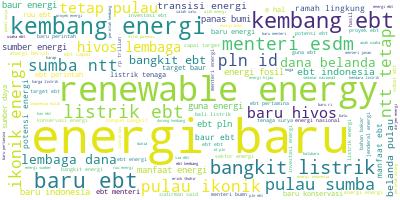

In [244]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df_new['tweet_tokens_stemmed_string'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [245]:
text = df_new['tweet_tokens_stemmed_string']
text_list =  [i.split() for i in text]
#text_list =  [i for i in text]
print(len(text_list))

109437


In [246]:
#https://sites.unpad.ac.id/widodo/2021/03/09/nlp-dengan-python/

In [247]:
text_list[0]

['lomba',
 'poster',
 'ilmiah',
 'energi',
 'baru',
 'deadline',
 'januari',
 'untuk',
 'siswa',
 'sma',
 'smk',
 'derajat']

In [248]:
import gensim
#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

In [249]:
text_list[0]

['lomba',
 'poster',
 'ilmiah',
 'energi',
 'baru',
 'deadline',
 'januari',
 'untuk',
 'siswa',
 'sma',
 'smk',
 'derajat',
 'lomba_poster',
 'siswa_sma']

In [250]:
bigram

In [251]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary<16355 unique tokens: ['deadline', 'derajat', 'ilmiah', 'januari', 'lomba']...>


In [252]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
#The function doc2bow converts document (a list of words) into the bag-of-words format
'''The function doc2bow() simply counts the number of occurrences of each distinct word, 
converts the word to its integer word id and returns the result as a sparse vector. 
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
the words computer (id 0) and human (id 1) appear once; 
the other ten dictionary words appear (implicitly) zero times.'''
print(len(doc_term_matrix))
print(doc_term_matrix[100])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

109437
[(35, 1), (188, 1)]


In [253]:
doc_term_matrix

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1)],
 [(12, 1), (13, 1)],
 [(14, 1), (15, 3), (16, 1), (17, 1), (18, 1)],
 [(19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1)],
 [(32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1)],
 [(32, 1), (33, 1), (34, 1), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1)],
 [(31, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 2),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 3),
  (49, 1),
  (50, 3),
  (51, 1),
  (52, 2),
  (53, 2),
  (54, 1)],
 [(55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1)],
 [(54, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1)],
 [(54, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1)],
 [(24, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1)],
 [(35, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 3), (77, 1)],
 [(35, 2), (72, 1), (73, 1), (74, 1), (75

In [254]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

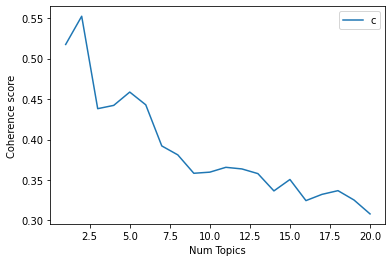

In [255]:
start=1
limit=21
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [256]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 3))

Num Topics = 1  has Coherence Value of 0.518
Num Topics = 2  has Coherence Value of 0.552
Num Topics = 3  has Coherence Value of 0.438
Num Topics = 4  has Coherence Value of 0.442
Num Topics = 5  has Coherence Value of 0.459
Num Topics = 6  has Coherence Value of 0.443
Num Topics = 7  has Coherence Value of 0.392
Num Topics = 8  has Coherence Value of 0.381
Num Topics = 9  has Coherence Value of 0.358
Num Topics = 10  has Coherence Value of 0.36
Num Topics = 11  has Coherence Value of 0.366
Num Topics = 12  has Coherence Value of 0.364
Num Topics = 13  has Coherence Value of 0.358
Num Topics = 14  has Coherence Value of 0.336
Num Topics = 15  has Coherence Value of 0.351
Num Topics = 16  has Coherence Value of 0.324
Num Topics = 17  has Coherence Value of 0.332
Num Topics = 18  has Coherence Value of 0.337
Num Topics = 19  has Coherence Value of 0.325
Num Topics = 20  has Coherence Value of 0.308


In [257]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=9) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))
    # yg belum remove Yang, yg,trus lower text

Topic: 0 Word: 0.042*"bangkit_listrik" + 0.025*"bangkit" + 0.022*"listrik" + 0.019*"pln" + 0.013*"net_zero" + 0.012*"plts_atap" + 0.012*"plts" + 0.012*"bangun" + 0.009*"proyek" + 0.009*"pasok_listrik"
Topic: 1 Word: 0.043*"id" + 0.019*"ruu" + 0.013*"komitmen" + 0.012*"komisi_vii" + 0.012*"pres" + 0.011*"depan" + 0.009*"tarif_listrik" + 0.009*"sepakat" + 0.009*"dpr" + 0.009*"andal"
Topic: 2 Word: 0.043*"transisi" + 0.016*"wujud" + 0.013*"tinggi_indonesia" + 0.013*"indonesia" + 0.013*"larang_ekspor" + 0.012*"kuat" + 0.012*"kembang" + 0.011*"capai_persen" + 0.011*"milik_potensi" + 0.010*"listrik"
Topic: 3 Word: 0.067*"capai_target" + 0.015*"capai" + 0.015*"indonesia_timur" + 0.014*"uu" + 0.014*"target" + 0.014*"yantie_pln" + 0.013*"bangun_infrastruktur" + 0.013*"konversi_pltd" + 0.013*"tinggal" + 0.012*"udien_pln"
Topic: 4 Word: 0.016*"bahan_bakar" + 0.016*"tambah" + 0.016*"hijau" + 0.015*"rencana" + 0.014*"biaya" + 0.014*"cepat_transisi" + 0.012*"kembang" + 0.011*"realisasi" + 0.010*"mog

In [258]:
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 5)]) #ubah2 yg ini
df=pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words_topic_20.csv")
#df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("top_words2_50_clean.csv")
print(df)


None


In [259]:
#ini dilakukan jika module belum tersedia
!pip install pyLDAvis
#!apt-get -qq install -y pyLDAvis

In [260]:
import pyLDAvis
import pyLDAvis.gensim_models;pyLDAvis.enable_notebook()
data = pyLDAvis.gensim_models.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'data/lda-gensim_clean_kualitatif1.html')

/Users/indralionardy/Personal/sara/tugas-akhir/venv/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/indralionardy/Personal/sara/tugas-akhir/venv/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/indralionardy/Personal/sara/tugas-akhir/venv/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/indralionardy/Personal/sara/tugas-akhir/venv/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.039038  0.171239       1        1  20.057253
0      0.141311 -0.105686       2        1  13.157782
7      0.069084 -0.117274       3        1  11.668036
8      0.137574 -0.118545       4        1  10.644070
2      0.139913  0.058588       5        1  10.496063
1     -0.058635 -0.019706       6        1   9.460027
4      0.037349  0.202208       7        1   9.361138
3     -0.246282 -0.199865       8        1   7.901574
5     -0.259353  0.129043       9        1   7.254059, topic_info=                  Term         Freq        Total Category  logprob  loglift
7140            pln_id  2374.000000  2374.000000  Default  30.0000  30.0000
3092      capai_target  1442.000000  1442.000000  Default  29.0000  29.0000
357       menteri_esdm  1449.000000  1449.000000  Default  28.0000  28.0000
783    bangkit_listrik  1516.000000  1516.000000  Default  

In [261]:
print(data)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.039038  0.171239       1        1  20.057253
0      0.141311 -0.105686       2        1  13.157782
7      0.069084 -0.117274       3        1  11.668036
8      0.137574 -0.118545       4        1  10.644070
2      0.139913  0.058588       5        1  10.496063
1     -0.058635 -0.019706       6        1   9.460027
4      0.037349  0.202208       7        1   9.361138
3     -0.246282 -0.199865       8        1   7.901574
5     -0.259353  0.129043       9        1   7.254059, topic_info=                  Term         Freq        Total Category  logprob  loglift
7140            pln_id  2374.000000  2374.000000  Default  30.0000  30.0000
3092      capai_target  1442.000000  1442.000000  Default  29.0000  29.0000
357       menteri_esdm  1449.000000  1449.000000  Default  28.0000  28.0000
783    bangkit_listrik  1516.000000  1516.000000  Default  

In [262]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
panel = gensimvis.prepare(model, corpus_tfidf, dictionary, mds='tsne')
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
6      111.092506 -133.722946       1        1  20.059405
0       34.946613  107.064590       2        1  13.158893
7      -28.088213 -159.949036       3        1  11.669332
8      147.698074   21.369604       4        1  10.636939
2      -97.501183  126.981384       5        1  10.498273
1       30.312096  -32.794945       6        1   9.460880
4     -155.443665 -118.494690       7        1   9.359408
3     -204.248108   22.596130       8        1   7.902799
5      -79.404678   -6.864717       9        1   7.254072, topic_info=                  Term         Freq        Total Category  logprob  loglift
7140            pln_id  2372.000000  2372.000000  Default  30.0000  30.0000
3092      capai_target  1442.000000  1442.000000  Default  29.0000  29.0000
357       menteri_esdm  1449.000000  1449.000000  Default  28.0000  28.0000
783    bangkit_listrik  1516.000000  1516.000000  Default  27.0000  27.0000
1537             mahal  1148.000000  1148.000000  Default  26.0000  26.0000
...                ...          ...          ...      ...      ...      ...
1916              situ    95.169280    96.089446   Topic9  -5.3333   2.6140
1542              ikan    91.941782    92.861941   Topic9  -5.3678   2.6136
13197              aya   168.958459   170.930062   Topic9  -4.7594   2.6120
39               power   486.798407   532.087807   Topic9  -3.7012   2.5346
444              kirim   130.628336   133.880352   Topic9  -5.0166   2.5990

[447 rows x 6 columns], token_table=       Topic      Freq              Term
term                                    
1784       4  0.982482               ada
1323       4  0.994382         airlangga
678        6  0.991177               akn
3655       8  0.993514        akselerasi
13540      3  0.982726  aktivis_lingkung
...      ...       ...               ...
2013       5  0.996748             wujud
6645       5  0.987849    wujud_komitmen
10521      8  0.991973            yantie
10522      8  0.996803        yantie_pln
2571       2  0.991786              zero

[674 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 8, 9, 3, 2, 5, 4, 6])